In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

from sklearn import preprocessing, decomposition, metrics, cluster
from scipy.cluster import hierarchy

# Récupération des données

In [2]:
# récupération des objets pickle

dict_quarter = pickle.load(open("pickle_dict_quarter.pkl", "rb"))
dict_month = pickle.load(open("pickle_dict_month.pkl", "rb"))

# Clusterisation du dernier trimestre

In [3]:
# normalisation du DataFrame

data = dict_quarter["2018Q2"]

scaler = preprocessing.StandardScaler()

scaled_data = scaler.fit_transform(data)

## Classification hiérarchique ascendante

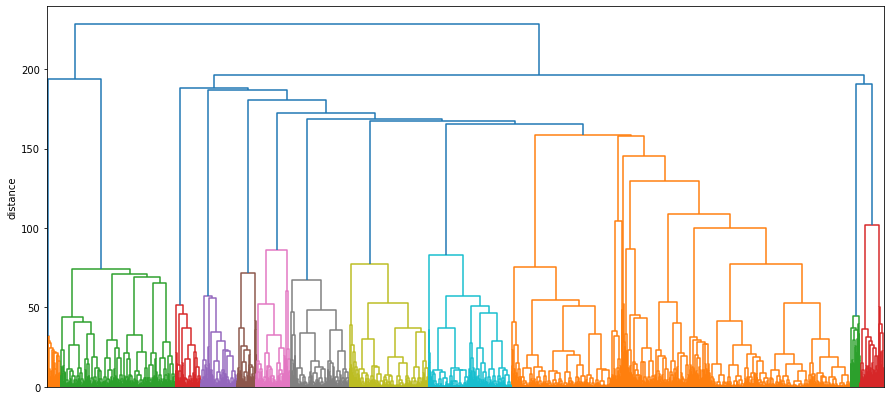

In [4]:
# CAH sur les données normalisées du dernier semestre avec distance de Ward

Z_quarter = hierarchy.linkage(scaled_data, 'ward')

plt.figure(figsize=(15, 7))
plt.ylabel('distance')
hierarchy.dendrogram(Z_quarter, no_labels=True)
plt.savefig("img/dendrogram.png")
plt.show()

In [5]:
# comparaison de différents clusterings par le coefficient de silhouette et l'indice de Davies-Bouldin

list_silh_score = list()
list_ind_db = list()
for nb_clusters in range(2,10):
    clusters = hierarchy.fcluster(Z_quarter, nb_clusters, criterion="maxclust")
    list_silh_score.append(metrics.silhouette_score(scaled_data, clusters))
    list_ind_db.append(metrics.davies_bouldin_score(scaled_data, clusters))
    


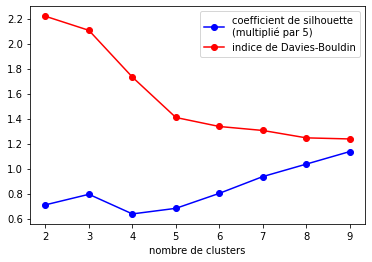

In [6]:
# visualisation

plt.plot(range(2,10), np.array(list_silh_score)*5, marker='o', color="blue",
         label="coefficient de silhouette\n(multiplié par 5)")
plt.plot(range(2,10), list_ind_db, marker='o', color='r', label="indice de Davies-Bouldin")
plt.xlabel("nombre de clusters")
plt.legend()
plt.savefig("img/perf_cah.png")

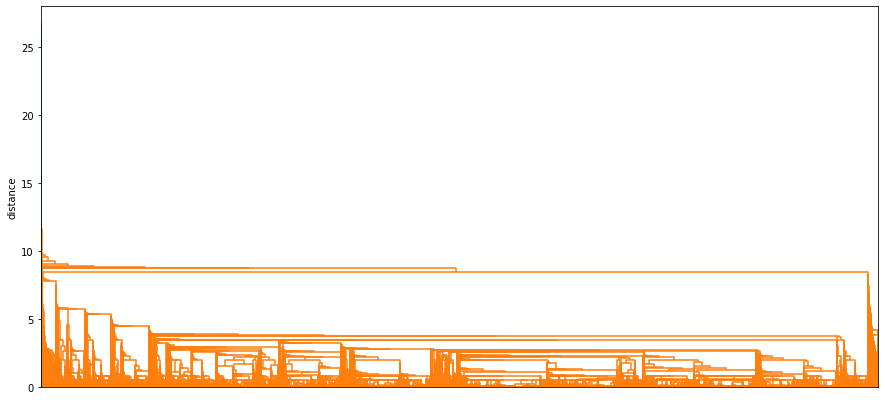

In [7]:
# CAH sur les données normalisées du dernier semestre avec distance simple

Z_quarter = hierarchy.linkage(scaled_data, method='single')

plt.figure(figsize=(15, 7))
plt.ylabel('distance')
hierarchy.dendrogram(Z_quarter, no_labels=True)
plt.show()

In [8]:
# comparaison de différents clusterings par le coefficient de silhouette et l'indice de Davies-Bouldin

list_silh_score = list()
list_ind_db = list()
for nb_clusters in range(2,10):
    clusters = hierarchy.fcluster(Z_quarter, nb_clusters, criterion="maxclust")
    list_silh_score.append(metrics.silhouette_score(scaled_data, clusters))
    list_ind_db.append(metrics.davies_bouldin_score(scaled_data, clusters))
    


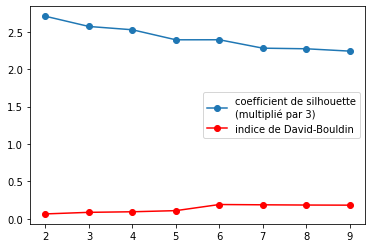

In [9]:
# visualisation

plt.plot(range(2,10), np.array(list_silh_score)*3, marker='o', 
         label="coefficient de silhouette\n(multiplié par 3)")
plt.plot(range(2,10), list_ind_db, marker='o', color='r', label="indice de David-Bouldin")
plt.legend()

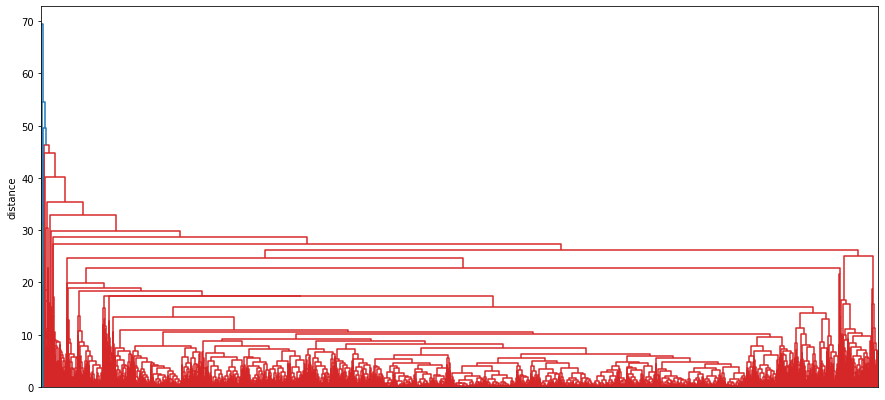

In [10]:
# CAH sur les données normalisées du dernier semestre avec distance complète

Z_quarter = hierarchy.linkage(scaled_data, method='complete')

plt.figure(figsize=(15, 7))
plt.ylabel('distance')
hierarchy.dendrogram(Z_quarter, no_labels=True)
plt.show()

In [11]:
# comparaison de différents clusterings par le coefficient de silhouette et l'indice de Davies-Bouldin

list_silh_score = list()
list_ind_db = list()
for nb_clusters in range(2,10):
    clusters = hierarchy.fcluster(Z_quarter, nb_clusters, criterion="maxclust")
    list_silh_score.append(metrics.silhouette_score(scaled_data, clusters))
    list_ind_db.append(metrics.davies_bouldin_score(scaled_data, clusters))
    


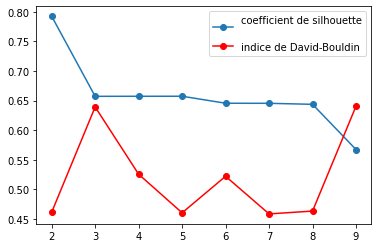

In [12]:
# visualisation

plt.plot(range(2,10), np.array(list_silh_score), marker='o', label="coefficient de silhouette\n")
plt.plot(range(2,10), list_ind_db, marker='o', color='r', label="indice de David-Bouldin")
plt.legend()

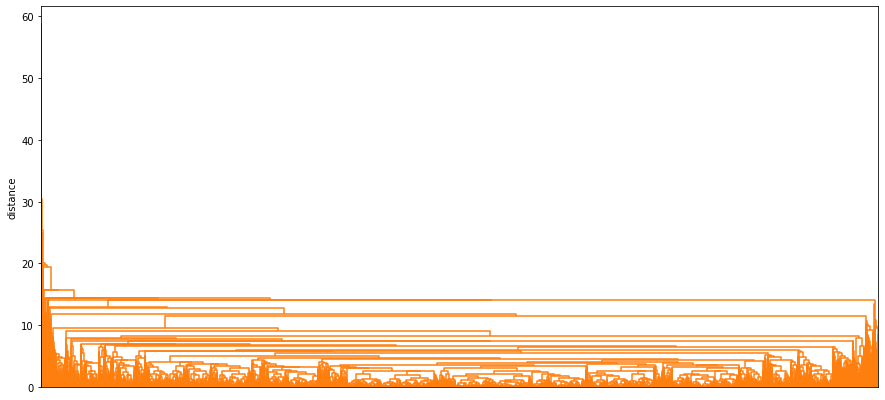

In [13]:
# CAH sur les données normalisées du dernier semestre avec distance moyenne

Z_quarter = hierarchy.linkage(scaled_data, method='average')

plt.figure(figsize=(15, 7))
plt.ylabel('distance')
hierarchy.dendrogram(Z_quarter, no_labels=True)
plt.show()

In [14]:
# comparaison de différents clusterings par le coefficient de silhouette et l'indice de Davies-Bouldin

list_silh_score = list()
list_ind_db = list()
for nb_clusters in range(2,10):
    clusters = hierarchy.fcluster(Z_quarter, nb_clusters, criterion="maxclust")
    list_silh_score.append(metrics.silhouette_score(scaled_data, clusters))
    list_ind_db.append(metrics.davies_bouldin_score(scaled_data, clusters))
    


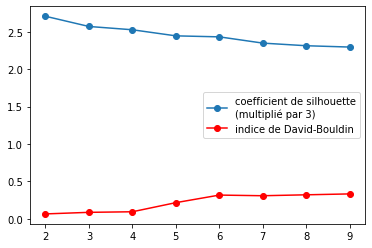

In [15]:
# visualisation

plt.plot(range(2,10), np.array(list_silh_score)*3, marker='o', 
         label="coefficient de silhouette\n(multiplié par 3)")
plt.plot(range(2,10), list_ind_db, marker='o', color='r', label="indice de David-Bouldin")
plt.legend()

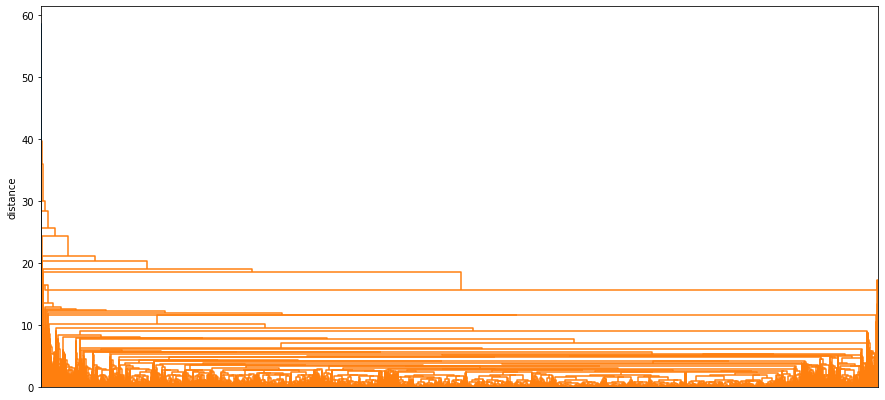

In [16]:
# CAH sur les données normalisées du dernier semestre avec distance des centroïdes

Z_quarter = hierarchy.linkage(scaled_data, method='centroid')

plt.figure(figsize=(15, 7))
plt.ylabel('distance')
hierarchy.dendrogram(Z_quarter, no_labels=True)
plt.show()

In [17]:
# comparaison de différents clusterings par le coefficient de silhouette et l'indice de Davies-Bouldin

list_silh_score = list()
list_ind_db = list()
for nb_clusters in range(2,10):
    clusters = hierarchy.fcluster(Z_quarter, nb_clusters, criterion="maxclust")
    list_silh_score.append(metrics.silhouette_score(scaled_data, clusters))
    list_ind_db.append(metrics.davies_bouldin_score(scaled_data, clusters))
    


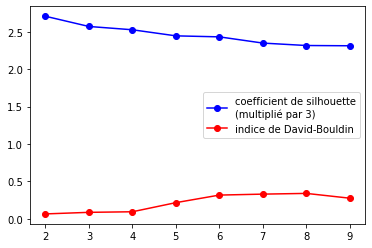

In [18]:
# visualisation

plt.plot(range(2,10), np.array(list_silh_score)*3, marker='o', color='blue',
         label="coefficient de silhouette\n(multiplié par 3)")
plt.plot(range(2,10), list_ind_db, marker='o', color='r', label="indice de David-Bouldin")
plt.legend()

#### Conclusion :
Un découpage en 9 clusters semble être le meilleur avec la distance de Ward.  
C'est cependant peu intéressant par rapport à la problématique métier.

## Algorithme kMeans

In [19]:
# comparaison des coef de silhouette et de l'indice de Davies-Bouldin
# en fonction du nb de clusters dans l'algo kMeans
# avec plusieurs initialisations pour voir la stabilité

list_silh = list()
list_db = list()
for i in range(10):
    list_silh.append(list())
    list_db.append(list())
for nb_clusters in range(2,9):
    for i in range(10):
        km = cluster.KMeans(n_clusters=nb_clusters, init="k-means++", n_init=1, random_state=i*nb_clusters)
        km.fit(scaled_data)
        list_silh[i].append(metrics.silhouette_score(scaled_data, km.labels_))
        list_db[i].append(metrics.davies_bouldin_score(scaled_data, km.labels_))

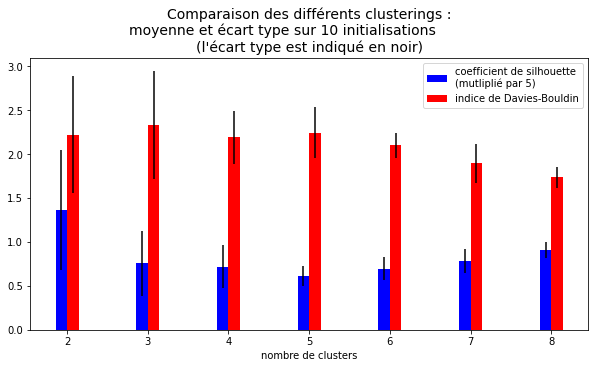

In [20]:
# visualisation des résultats

list_silh_mean = list()
list_silh_std = list()
list_db_mean = list()
list_db_std = list()
for i in range(7):
    silh = np.array([list_silh[j][i] for j in range(10)])
    list_silh_mean.append(silh.mean())
    list_silh_std.append(silh.std())
    db = np.array([list_db[j][i] for j in range(10)])
    list_db_mean.append(db.mean())
    list_db_std.append(db.std())
    
width = 1/7
ind = np.arange(7)

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111) 

ax.bar(x=ind+width, height=np.array(list_silh_mean)*5, width=width, 
       label="coefficient de silhouette\n(mutliplié par 5)", color="blue",
       yerr=np.array(list_silh_std)*5, ecolor="black")
ax.bar(x=ind+2*width, height=list_db_mean, width=width, label="indice de Davies-Bouldin",
       color="red", yerr=np.array(list_db_std), ecolor="black")   
ax.legend()
ax.set_xticks(ind+width*1.5)
ax.set_xticklabels(range(2,9))
ax.set_xlabel("nombre de clusters")

plt.title("Comparaison des différents clusterings :\nmoyenne et écart type sur 10 initialisations\
            \n(l'écart type est indiqué en noir)", fontsize=14)

plt.savefig("img/comparaison.png", bbox_inches="tight")

plt.show()

#### Conclusion :
Un découpage en 8 clusters est le meilleur, mais cela rend l'interprétation trop complexe.  
4 clusters semble être le meilleur compromis.

## Clustering par DBSCAN

In [21]:
# DBSCAN sur le dernier mois

scaled_data_month = preprocessing.StandardScaler().fit_transform(dict_month["2018-06"])

clustering = cluster.DBSCAN(n_jobs=-1).fit(scaled_data_month)



In [22]:
# nombre de séries obtenues

pd.Series(clustering.labels_).unique()

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15, 156,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29, 217,  30,  31, 177,  32,  33,  67,
       211,  34,  35,  36,  37,  38, 194,  39,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  52,  53, 107, 185,  54,  55,
        56,  57,  95,  58,  59,  60,  61,  62, 179,  63,  64,  65,  66,
        68, 159,  69,  70,  71,  72,  73,  74,  75,  76, 100,  77, 165,
        78, 144,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  96,  97,  98, 200,  99, 101, 102, 103,
       104, 105, 215, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 128, 120, 121, 122, 123, 124, 125, 126, 127, 129,
       130, 131, 132, 133, 153, 134, 135, 136, 137, 138, 204, 139, 140,
       191, 141, 142, 143, 145, 146, 166, 207, 147, 148, 149, 150, 199,
       151, 152, 161, 193, 154, 155, 157, 158, 160, 162, 163, 16

#### Conclusion :
Il y a trop de classes...

## Clustering par classification spectrale

In [23]:
spectral = cluster.SpectralClustering(n_clusters=4, eigen_solver='arpack', 
                                      affinity='nearest_neighbors').fit(scaled_data)

/home/samuel/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


#### Conclusion : 
La situation n'est pas compatible avec la classification spectrale.

## Conclusion :

Le meilleur compromis semble être 4 clusters avec l'algorithme kMeans.

# Clusterisation des données

In [24]:
# optimisation de kMeans

list_silh = list()
list_db = list()
params = np.logspace(-5, -1, 5)
for tol in params:
    km = cluster.KMeans(n_clusters=4, init="k-means++", n_init=1, random_state=42, tol=tol)
    km.fit(scaled_data)
    list_silh.append(metrics.silhouette_score(scaled_data, km.labels_))
    list_db.append(metrics.davies_bouldin_score(scaled_data, km.labels_))

print(params)
print(list_silh)
print(list_db)

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]
[0.09042975652315764, 0.0904267002199237, 0.09158903230023131, 0.08927718655146591, 0.08810338139735803]
[2.800681595204956, 2.7998646747200753, 2.79446029148563, 2.7716099332655917, 2.7723584734736715]


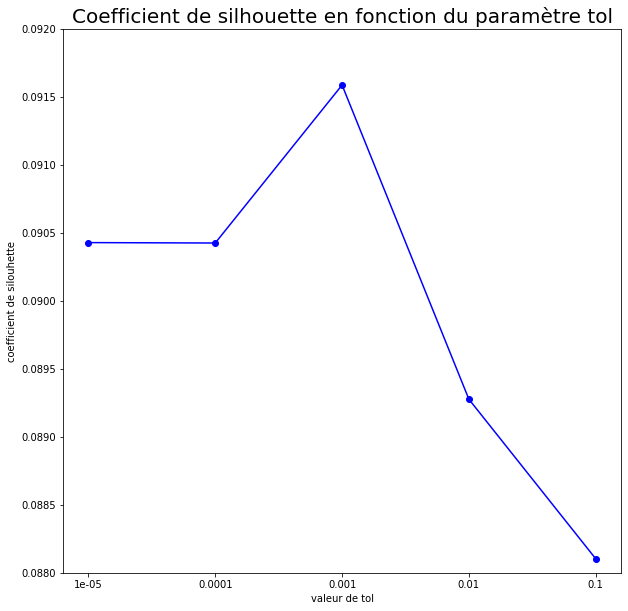

In [25]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(list_silh, marker='o', color='blue')
ax.set_xticks(range(5))
ax.set_xticklabels(params)
plt.ylim((0.088, 0.092))
plt.title("Coefficient de silhouette en fonction du paramètre tol", fontsize=20)
plt.xlabel("valeur de tol")
plt.ylabel("coefficient de silouhette")
plt.savefig("img/optimisation_silhouette.png")

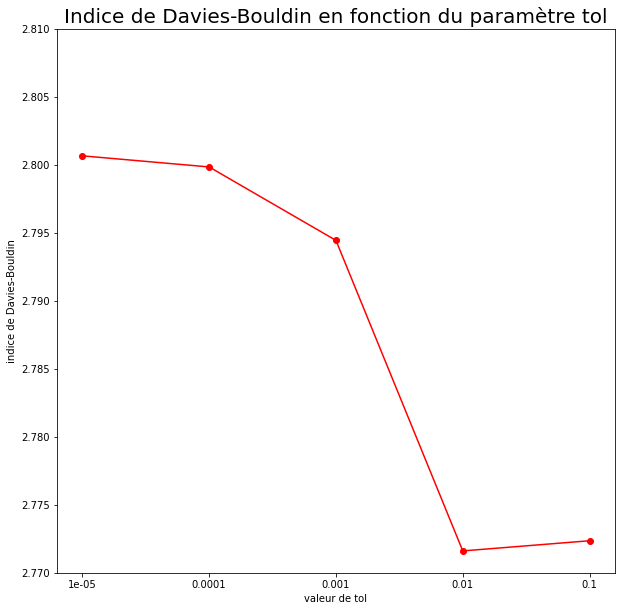

In [26]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(list_db, marker='o', color='red')
ax.set_xticks(range(5))
ax.set_xticklabels(params)
plt.ylim((2.77, 2.81))
plt.title("Indice de Davies-Bouldin en fonction du paramètre tol", fontsize=20)
plt.xlabel("valeur de tol")
plt.ylabel("indice de Davies-Bouldin")
plt.savefig("img/optimisation_db.png")

On constate qu'il y a un léger gain avec une valeur du paramètre tol de 0.01

In [27]:
# séparation de chaque trimestre en 4 clusters
cls = cluster.KMeans(n_clusters=4, init="k-means++", random_state=42, tol=0.01)
cls.fit(scaled_data)
init = cls.cluster_centers_

scaler = preprocessing.StandardScaler()
dict_clustered_quarters = dict()
dict_centroids_quarters = dict()
for key, df in dict_quarter.items():
    clustered_df = df.copy()
    sc_data = scaler.fit_transform(df)
    cls = cluster.KMeans(n_clusters=4, init=init, n_init=1, random_state=42, tol=10e-10)
    cls.fit(sc_data)
    dict_centroids_quarters[key] = pd.DataFrame(scaler.inverse_transform(cls.cluster_centers_), 
                                                columns=df.columns)
    clustered_df["cluster"] = cls.labels_
    dict_clustered_quarters[key] = clustered_df

In [28]:
# enregistrement des résultats

pickle.dump(dict_clustered_quarters, open("pickle_dict_clustered_quarters.pkl", "wb"))
pickle.dump(dict_centroids_quarters, open("pickle_dict_centroids_quarters.pkl", "wb"))